In [1]:
# 0단계 : 맥도날드 사이트로 이동하고 서울지역의 매장검색
# 셀리니움을 통해 구현한다.

# 과제1 : 맥도날드 홈페이지에서 서울지역의 모든 매장정보를 크롤링
# 과제2 : 크롤링한 데이터에서 서울시의 각 구별로 맥도날드매장 갯수를 집계하고 지도에 컬러맵으로 시각화 (좌표가져와야한다.)
# 과제3 : 서울시 구별 인구대비 구별 맥도날드매장 수의 지표값(rate)을 만들고 컬럼 추가 저장
# 과제4 : 유동인구가 가장 많은 구 TOP5 유추
# 과제5 : 컬럼별 상관관계에 대한 정보를 시각화 (차트이용)


In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython.display import Image

import pandas as pd
import time
import re

### 0단계 : 맥도날드 셀리니윰 구현

In [3]:
# 웹드라이브로 크롬브라우즈 띄운다.
driver_path = "../driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

C:\Users\student\AppData\Local\Temp\ipykernel_9856\3620293503.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path)


In [4]:
url_page = 'https://www.google.com/'
driver.get(url_page)

In [5]:
from selenium.webdriver.common.by import By

In [6]:
# 검색창 검색어 입력
css_selector = 'body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf > div.RNNXgb > div > div.a4bIc > input'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).send_keys('맥도날드')

In [7]:
# 첫번째 선택
css_selector = 'body > div.L3eUgb > div.o3j99.ikrT4e.om7nvf > form > div:nth-child(1) > div.A8SBwf.emcav > div.UUbT9 > div.aajZCb > div.mkHrUc > ul.erkvQe > div > ul > li:nth-child(1) > div > div.sbic.vYOkbe'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [8]:
# 첫번째로 검색된 맥도날드 클릭
css_selector = '#rso > div:nth-child(1) > div > div > div > div > div > div > div.yuRUbf > a > h3'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

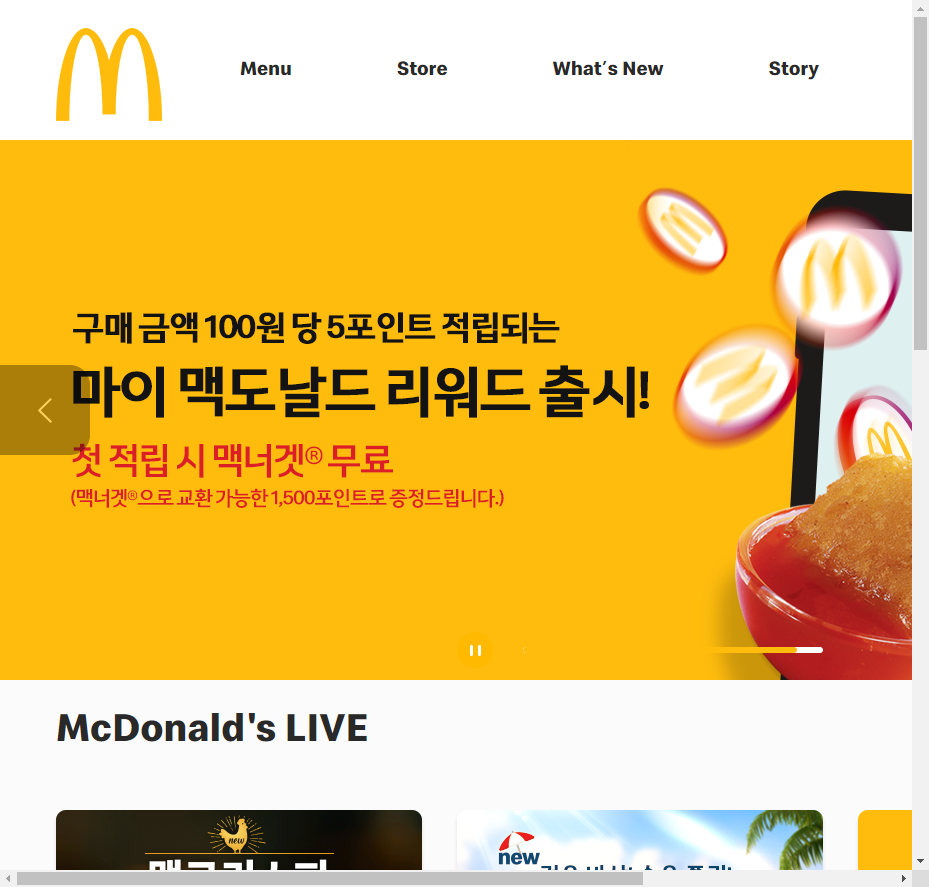

In [9]:
# 사이트 캡쳐하기
capture_img = './images/mcdonalds_kr.png'
driver.save_screenshot(capture_img)
Image(capture_img)

In [10]:
# 맥도널드 url 저장
mcdonalds_url = driver.current_url
mcdonalds_url

'https://www.mcdonalds.co.kr/kor/main.do'

In [11]:
# Store 누르고
css_selector = 'body > div.wrapper > header > div > nav > div > ul > li:nth-child(2) > a'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

In [12]:
# xpath로
driver.find_element_by_xpath('//*[@id="searchWord"]').send_keys('서울')

C:\Users\student\AppData\Local\Temp\ipykernel_9856\3718060461.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="searchWord"]').send_keys('서울')


In [13]:
# 검색하기
css_selector = '#searchForm > div > fieldset > div > button'
driver.find_element(by=By.CSS_SELECTOR, value=css_selector).click()

### 과제1 : 맥도날드 홈페이지에서 서울지역의 모든 매장정보를 크롤링

In [73]:
# 페이지 BeautifulSoup 객체로 가져온다
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [ ]:
#자바스크립트 함수 작동
driver.implicitly_wait(5)
page_no = page_x
driver.execute_script('page({})'.format(page_no))

In [74]:
# Crawling Data : mc_name, mc_addr_old, mc_addr_new, mc_phone, mc_opening, mc_service
# 매장이름, 매장지번주소, 매장도로명주소, 매장번호, 매장운영시간, 매장서비스
mc_tot = soup.find('tbody') #tbody는 하나니까 find로 찾아줘야 find_all로 했을시 뒤의 오류가 없다.
mc_tot 

<tbody>
<tr>
<td class="tdName">
<dl class="name">
<dt><em class="ico">A</em><strong class="tit"><a href="javascript:moveMap(37.5667729,126.9794809);" title="지도보기">서울시청</a></strong>
</dt><dd>서울 중구 을지로1가 32</dd>
<dd class="road">서울 중구 남대문로9길 51 효덕빌딩</dd>
</dl>
</td>
<td>070-7017-0155 <br/></td>
<td>07:00~24:00 </td>
<td class="tdService">
<div class="service">
<span class="srvc">
<input checked="" disabled="" id="2" type="checkbox"/>
<label for="2">
<span class="icon"><img alt="맥딜리버리" src="/upload/main/store_service/1580887371824.png"/></span>
			                                     	   		맥딜리버리
			                                     	   </label>
</span>
<span class="srvc">
<input checked="" disabled="" id="4" type="checkbox"/>
<label for="4">
<span class="icon"><img alt="맥모닝" src="/upload/main/store_service/1580887410227.png"/></span>
			                                     	   		맥모닝
			                                     	   </label>
</span>
<span class="srvc">
<input checked="" disa

In [70]:
# 1.매장이름 (영문, 주소 등 )
mc_info = mc_tot.find_all('tr')
mc_info
# 인덱스  0~4까지 한페이지의 5개값을 가지고 있다. 전체 페이지의 값을 불러오는 것은?
# 전체 페이지는 for문을 활용하여 2번튼 누르고 또 가져오고 이런것을 반복한다.
# for 2번 누르기
#  find_all(가져오기)
# for 1번 페이지에서 매장이름, 매장지번주소, 매장도로명주소, 매장번호, 매장운영시간, 매장서비스 가져오기
# Crawling Data : mc_name, mc_addr_old, mc_addr_new, mc_phone, mc_opening, mc_service

# mc_name = mc_info[0].find('strong','tit').get_text().strip() # 매장이름
# mc_location_1 = mc_info[0].find('dd').get_text().strip() # 매장지번주소
# mc_location_2 = mc_info[0].find('dd','road').get_text().strip() # 매장도로명주소
# mc_number = mc_info[0].find_all('td')[1].get_text().strip() # 매장번호, [1] 고정
# mc_time = mc_info[0].find_all('td')[2].get_text().strip() # 매장시간, [2] 고정
# mc_service = mc_info[0].find_all('td')[3].get_text().strip() # 매장서비스, [3] 고정
# mc_service = mc_service.replace(" ",'').strip()
# mc_service = mc_service.replace('\t',"").strip()
# mc_service = mc_service.replace('\n\n\n\n\n\n\n',",").strip()
# mc_gps = mc_info[0].find('a')['href'].split(':')[1]
# mc_gps = mc_gps.split('(')[1]
# mc_gps = mc_gps.replace(');','').strip()
# mc_gps

[<tr>
 <td class="tdName">
 <dl class="name">
 <dt><em class="ico">A</em><strong class="tit"><a href="javascript:moveMap(37.5667729,126.9794809);" title="지도보기">서울시청</a></strong>
 </dt><dd>서울 중구 을지로1가 32</dd>
 <dd class="road">서울 중구 남대문로9길 51 효덕빌딩</dd>
 </dl>
 </td>
 <td>070-7017-0155 <br/></td>
 <td>07:00~24:00 </td>
 <td class="tdService">
 <div class="service">
 <span class="srvc">
 <input checked="" disabled="" id="2" type="checkbox"/>
 <label for="2">
 <span class="icon"><img alt="맥딜리버리" src="/upload/main/store_service/1580887371824.png"/></span>
 			                                     	   		맥딜리버리
 			                                     	   </label>
 </span>
 <span class="srvc">
 <input checked="" disabled="" id="4" type="checkbox"/>
 <label for="4">
 <span class="icon"><img alt="맥모닝" src="/upload/main/store_service/1580887410227.png"/></span>
 			                                     	   		맥모닝
 			                                     	   </label>
 </span>
 <span class="srvc">
 <i

In [17]:
# 페이지의 마지막 가져오기 -> for문의 len을 결정한다.

mc_page = soup.find('div','btnPaging') #tbody는 하나니까 find로 찾아줘야 find_all로 했을시 뒤의 오류가 없다.
# soup = soup.find_all('dl','name')
mc_page = mc_page.find('a','arrow last')['href']
mc_page = mc_page.split(':')[1]
mc_page = list(mc_page)
mc_page = int(mc_page[5]+mc_page[6])
mc_page # int형이다.
# type(mc_page)

20

In [75]:
mcName    = list()
mcAddrOld = list()
mcAddrNew = list()
mcPhone   = list()
mcOpening = list()
mcService = list()
mcGps     = list()

html = driver.page_source
soup = BeautifulSoup(html, "lxml")
#최대 페이지 수 가져오기
mc_page = soup.find('div','btnPaging') 
mc_page = mc_page.find('a','arrow last')['href']
mc_page = mc_page.split(':')[1]
mc_page = list(mc_page)
mc_page = int(mc_page[5]+mc_page[6]) # int형이다.

for page_x in range(1,mc_page+1):

    #자바스크립트 함수 작동
    driver.implicitly_wait(5)
    page_no = page_x
    driver.execute_script('page({})'.format(page_no))
    
    # 페이지 BeautifulSoup 객체로 가져온다
    html = driver.page_source
    soup = BeautifulSoup(html, "lxml")

    print('페이지 클릭은 = {}' .format(page_x))
    
    mc_tot = soup.find('tbody') #tbody는 하나니까 find로 찾아줘야 find_all로 했을시 뒤의 오류가 없다.
    mc_info = mc_tot.find_all('tr')
    
#     print(mc_info)
    
    for x in range(len(mc_info)): #한페이지의 순위만큼

        mc_name = mc_info[x].find('strong','tit').get_text().strip() # 매장이름
        mc_location_1 = mc_info[x].find('dd').get_text().strip() # 매장지번주소
        mc_location_2 = mc_info[x].find('dd','road').get_text().strip() # 매장도로명주소
        mc_number = mc_info[x].find_all('td')[1].get_text().strip() # 매장번호, [1] 고정
        mc_time = mc_info[x].find_all('td')[2].get_text().strip() # 매장시간, [2] 고정
        mc_service = mc_info[x].find_all('td')[3].get_text().strip() # 매장서비스, [3] 고정
        mc_service = mc_service.replace(" ",'').strip()
        mc_service = mc_service.replace('\t',"").strip()
        mc_service = mc_service.replace('\n\n\n\n\n\n\n',",").strip()
        mc_gps = mc_info[x].find('a')['href'].split(':')[1]
        mc_gps = mc_gps.split('(')[1]
        mc_gps = mc_gps.replace(');','').strip()

        mcName.append(mc_name)
        mcAddrOld.append(mc_location_1)
        mcAddrNew.append(mc_location_2)
        mcPhone.append(mc_number)
        mcOpening.append(mc_time)
        mcService.append(mc_service)
        mcGps.append(mc_gps)

        print('한페이지당 가져오는 데이터개수는 = {}' .format(x))

페이지 클릭은 = 1
한페이지당 가져오는 데이터개수는 = 0
한페이지당 가져오는 데이터개수는 = 1
한페이지당 가져오는 데이터개수는 = 2
한페이지당 가져오는 데이터개수는 = 3
한페이지당 가져오는 데이터개수는 = 4
페이지 클릭은 = 2
한페이지당 가져오는 데이터개수는 = 0
한페이지당 가져오는 데이터개수는 = 1
한페이지당 가져오는 데이터개수는 = 2
한페이지당 가져오는 데이터개수는 = 3
한페이지당 가져오는 데이터개수는 = 4
페이지 클릭은 = 3
한페이지당 가져오는 데이터개수는 = 0
한페이지당 가져오는 데이터개수는 = 1
한페이지당 가져오는 데이터개수는 = 2
한페이지당 가져오는 데이터개수는 = 3
한페이지당 가져오는 데이터개수는 = 4
페이지 클릭은 = 4
한페이지당 가져오는 데이터개수는 = 0
한페이지당 가져오는 데이터개수는 = 1
한페이지당 가져오는 데이터개수는 = 2
한페이지당 가져오는 데이터개수는 = 3
한페이지당 가져오는 데이터개수는 = 4
페이지 클릭은 = 5
한페이지당 가져오는 데이터개수는 = 0
한페이지당 가져오는 데이터개수는 = 1
한페이지당 가져오는 데이터개수는 = 2
한페이지당 가져오는 데이터개수는 = 3
한페이지당 가져오는 데이터개수는 = 4
페이지 클릭은 = 6
한페이지당 가져오는 데이터개수는 = 0
한페이지당 가져오는 데이터개수는 = 1
한페이지당 가져오는 데이터개수는 = 2
한페이지당 가져오는 데이터개수는 = 3
한페이지당 가져오는 데이터개수는 = 4
페이지 클릭은 = 7
한페이지당 가져오는 데이터개수는 = 0
한페이지당 가져오는 데이터개수는 = 1
한페이지당 가져오는 데이터개수는 = 2
한페이지당 가져오는 데이터개수는 = 3
한페이지당 가져오는 데이터개수는 = 4
페이지 클릭은 = 8
한페이지당 가져오는 데이터개수는 = 0
한페이지당 가져오는 데이터개수는 = 1
한페이지당 가져오는 데이터개수는 = 2
한페이지당 가져오는 데이터개수는 = 3
한페이지당 가져오는 데이터개수는 = 4
페이지 클릭은 = 9
한페이지당 가져오는 데

In [76]:
mcName

['강남 2호점',
 '미아역',
 '마리오 아울렛',
 '등촌 DT',
 '잠실역',
 '성균관대',
 '석촌역',
 '서울교대점',
 '양평SK DT',
 '신월남부 DT점',
 '연세대점',
 '삼성역',
 '합정메세나폴리스',
 '여의도',
 '강남구청',
 '어린이대공원점',
 '명동 2호점',
 '가산디지털',
 '양재 SK DT',
 '가산비지니스센터점',
 '이수점',
 '신도림 디큐브',
 '공덕점',
 '중앙대',
 '한티역',
 '선릉',
 '서초GS점',
 '명동',
 '구로디지털',
 '종로 3',
 '은평이마트',
 '압구정CGV',
 '서초뱅뱅',
 '쌍문DT점',
 '성수이마트',
 '양재',
 '신도림 테크노점',
 '서울역',
 '종암SK',
 '구산',
 '가락DT점',
 '신천',
 '송정역',
 '전농',
 '파리공원점',
 '연신내',
 '상봉이마트',
 '청담DT',
 '양천구청DT점',
 '한양대',
 '신내',
 '대학로',
 '중계역',
 '구의역',
 '목동',
 '중랑',
 '중계',
 '삼선',
 '영등포',
 '신림',
 '안암',
 '수유',
 '방배',
 '노량진',
 '이태원',
 '신월DT',
 '장안사거리점',
 '외대',
 '신사역',
 '학동역',
 '염창 DT점',
 '명지대점',
 '숭실대',
 '상계DT',
 '양주휴게소DT',
 '상일동점',
 '방학역DT점',
 '송파잠실DT',
 '과학기술대점',
 '서울시흥DT',
 '서울번동DT점',
 '미아DT',
 '우장산DT',
 '굽은다리역DT',
 '서울둔촌DT',
 '고척DT',
 '보라매',
 '코엑스',
 '서울 상암 DMC',
 '홍제역',
 '강남삼성DT',
 '동묘',
 '망원점',
 '위례신도시',
 '세이브존 노원',
 '서울시청']

In [77]:
mcGps

['37.4986859,127.0287553',
 '37.626944,127.026192',
 '37.4779193,126.8872055',
 '37.5582134,126.8597362',
 '37.5150646,127.0996860',
 '37.5834143,126.9988817',
 '37.5059873,127.1091036',
 '37.4939517,127.0161834',
 '37.5309805,126.893343',
 '37.5197288,126.8387402',
 '37.5585515,126.9367086',
 '37.5082794,127.0587636',
 '37.5507165,126.9134947',
 '37.525103,126.92577838897705',
 '37.5162358,127.0413134',
 '37.5472224,127.0730854',
 '37.5605158,126.9846104',
 '37.4813244,126.8837789',
 '37.478071,127.03961',
 '37.4801705,126.8811402',
 '37.484658,126.980731',
 '37.5094279,126.8898029',
 '37.5411571,126.9471352',
 '37.506553,126.958968',
 '37.4973442,127.055157',
 '37.5034932,127.0470395',
 '37.486518,127.009527',
 '37.564146,126.9845069',
 '37.485098,126.8950405',
 '37.570588,126.990462',
 '37.600317,126.920178',
 '37.524435,127.028976',
 '37.490081,127.030926',
 '37.653641,127.037193',
 '37.540261,127.053351',
 '37.4822573,127.0358688',
 '37.506818,126.890674',
 '37.5546203,126.9704671

In [ ]:
# 96개 동일
# len(mcName)
# len(mcAddrOld)
# len(mcAddrNew)
# len(mcPhone)
# len(mcOpening)
# len(mcService)
# len(mcGps)

In [ ]:
# mcAddrNew[0].split(' ')[0] #시
# mcAddrNew[0].split(' ')[1] #구
# mcAddrNew[0].split(' ')[2] #동

In [78]:
Si = []
Gu = []
Dong = []

for x in range(len(mcAddrNew)):
    si = mcAddrNew[x].split(' ')[0]
    gu = mcAddrNew[x].split(' ')[1]
    dong = mcAddrNew[x].split(' ')[2]
    
    Si.append(si)
    Gu.append(gu)
    Dong.append(dong)
    

In [79]:
# 데이터 프레임 만들기
mc_dict = {'매장명':mcName, '시':Si, '구':Gu, '동':Dong, '지번주소':mcAddrOld, '도로명주소':mcAddrNew
           , '전화번호':mcPhone, '영업시간':mcOpening, '이용가능서비스':mcService, '위도경도':mcGps}
mc_dict

{'매장명': ['강남 2호점',
  '미아역',
  '마리오 아울렛',
  '등촌 DT',
  '잠실역',
  '성균관대',
  '석촌역',
  '서울교대점',
  '양평SK DT',
  '신월남부 DT점',
  '연세대점',
  '삼성역',
  '합정메세나폴리스',
  '여의도',
  '강남구청',
  '어린이대공원점',
  '명동 2호점',
  '가산디지털',
  '양재 SK DT',
  '가산비지니스센터점',
  '이수점',
  '신도림 디큐브',
  '공덕점',
  '중앙대',
  '한티역',
  '선릉',
  '서초GS점',
  '명동',
  '구로디지털',
  '종로 3',
  '은평이마트',
  '압구정CGV',
  '서초뱅뱅',
  '쌍문DT점',
  '성수이마트',
  '양재',
  '신도림 테크노점',
  '서울역',
  '종암SK',
  '구산',
  '가락DT점',
  '신천',
  '송정역',
  '전농',
  '파리공원점',
  '연신내',
  '상봉이마트',
  '청담DT',
  '양천구청DT점',
  '한양대',
  '신내',
  '대학로',
  '중계역',
  '구의역',
  '목동',
  '중랑',
  '중계',
  '삼선',
  '영등포',
  '신림',
  '안암',
  '수유',
  '방배',
  '노량진',
  '이태원',
  '신월DT',
  '장안사거리점',
  '외대',
  '신사역',
  '학동역',
  '염창 DT점',
  '명지대점',
  '숭실대',
  '상계DT',
  '양주휴게소DT',
  '상일동점',
  '방학역DT점',
  '송파잠실DT',
  '과학기술대점',
  '서울시흥DT',
  '서울번동DT점',
  '미아DT',
  '우장산DT',
  '굽은다리역DT',
  '서울둔촌DT',
  '고척DT',
  '보라매',
  '코엑스',
  '서울 상암 DMC',
  '홍제역',
  '강남삼성DT',
  '동묘',
  '망원점',
  '위례신도시',
  '세이브존 노원',
  '서울시청'],
 '시'

In [80]:
macdonald_df = pd.DataFrame(mc_dict)
macdonald_df.head(10)

,매장명,시,구,동,지번주소,도로명주소,전화번호,영업시간,이용가능서비스,위도경도
0,강남 2호점,서울,강남구,테헤란로,서울 강남구 역삼동 822-2,서울 강남구 테헤란로 107 메디타워2층,070-7017-6865,08:00~24:00,"맥딜리버리,맥모닝,디카페인커피","37.4986859,127.0287553"
1,미아역,서울,강북구,도봉로,서울 강북구 미아동 197-5,서울 강북구 도봉로 204 미아역 맥도날드,070-7017-6856,07:00~02:00,"맥딜리버리,맥모닝,디카페인커피","37.626944,127.026192"
2,마리오 아울렛,서울,금천구,디지털로,서울 금천구 가산동 60-22,서울 금천구 디지털로 185 마리오아울렛1,070-7017-6527,10:00~22:00,"맥모닝,주차,디카페인커피","37.4779193,126.8872055"
3,등촌 DT,서울,강서구,양천로,서울 강서구 등촌동 630,서울 강서구 양천로 546,070-7017-6526,24시간,"24시간,맥드라이브,맥딜리버리,맥모닝,주차,디카페인커피","37.5582134,126.8597362"
4,잠실역,서울,송파구,송파대로,서울 송파구 신천동 7-25,서울 송파구 송파대로 558,070-7017-6952,24시간,"24시간,맥딜리버리,맥모닝,디카페인커피","37.5150646,127.0996860"
5,성균관대,서울,종로구,창경궁로,서울 종로구 명륜2가 197-1,서울 종로구 창경궁로 241-1,070-7017-6520,08:00~24:00,"맥딜리버리,맥모닝,디카페인커피","37.5834143,126.9988817"
6,석촌역,서울,송파구,백제고분로,서울 송파구 송파동 84,서울 송파구 백제고분로 390,070-7017-6515,24시간,"24시간,맥딜리버리,맥모닝,디카페인커피","37.5059873,127.1091036"
7,서울교대점,서울,서초구,서초대로,서울 서초구 서초동 1674-5,서울 서초구 서초대로 316(서초동),070-7017-6987 070-7017-6989,10:00~22:30,"맥딜리버리,맥모닝,주차,디카페인커피","37.4939517,127.0161834"
8,양평SK DT,서울,영등포구,선유로,서울 영등포구 양평동3가 80-2,서울 영등포구 선유로 195,070-7017-6505,24시간,"24시간,맥드라이브,맥딜리버리,맥모닝,주차,디카페인커피","37.5309805,126.893343"
9,신월남부 DT점,서울,양천구,남부순환로,서울 양천구 신월동 525-1,서울 양천구 남부순환로 553 (신월동),070-7017-6917 070-7017-6772,07:00~24:00,"맥드라이브,맥딜리버리,맥모닝,주차","37.5197288,126.8387402"


In [81]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [108]:
mcName

['강남 2호점',
 '미아역',
 '마리오 아울렛',
 '등촌 DT',
 '잠실역',
 '성균관대',
 '석촌역',
 '서울교대점',
 '양평SK DT',
 '신월남부 DT점',
 '연세대점',
 '삼성역',
 '합정메세나폴리스',
 '여의도',
 '강남구청',
 '어린이대공원점',
 '명동 2호점',
 '가산디지털',
 '양재 SK DT',
 '가산비지니스센터점',
 '이수점',
 '신도림 디큐브',
 '공덕점',
 '중앙대',
 '한티역',
 '선릉',
 '서초GS점',
 '명동',
 '구로디지털',
 '종로 3',
 '은평이마트',
 '압구정CGV',
 '서초뱅뱅',
 '쌍문DT점',
 '성수이마트',
 '양재',
 '신도림 테크노점',
 '서울역',
 '종암SK',
 '구산',
 '가락DT점',
 '신천',
 '송정역',
 '전농',
 '파리공원점',
 '연신내',
 '상봉이마트',
 '청담DT',
 '양천구청DT점',
 '한양대',
 '신내',
 '대학로',
 '중계역',
 '구의역',
 '목동',
 '중랑',
 '중계',
 '삼선',
 '영등포',
 '신림',
 '안암',
 '수유',
 '방배',
 '노량진',
 '이태원',
 '신월DT',
 '장안사거리점',
 '외대',
 '신사역',
 '학동역',
 '염창 DT점',
 '명지대점',
 '숭실대',
 '상계DT',
 '양주휴게소DT',
 '상일동점',
 '방학역DT점',
 '송파잠실DT',
 '과학기술대점',
 '서울시흥DT',
 '서울번동DT점',
 '미아DT',
 '우장산DT',
 '굽은다리역DT',
 '서울둔촌DT',
 '고척DT',
 '보라매',
 '코엑스',
 '서울 상암 DMC',
 '홍제역',
 '강남삼성DT',
 '동묘',
 '망원점',
 '위례신도시',
 '세이브존 노원',
 '서울시청']

In [120]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [137]:
map_1 = folium.Map(location=[mcGps[0].split(',')[0].strip(), mcGps[0].split(',')[1].strip()], zoom_start=11, tiles='Stamen Toner')

for idx in range(len(mcGps)):
    folium.Marker([mcGps[idx].split(',')[0].strip(), mcGps[idx].split(',')[1].strip()]
                  , popup = mcName[idx]
                  ,tiles = 'Stamen Terrain').add_to(map_1)
    folium.CircleMarker([mcGps[idx].split(',')[0].strip(), mcGps[idx].split(',')[1].strip()], radius=5, popup = mcName[idx], color='#3186cc', fill_color='#3186cc' ).add_to(map_1)

map_1

In [24]:
len(macdonald_df)

96

In [27]:
%pwd

'C:\\Users\\student\\Anaconda_src\\S01_Pyton_Review'

In [28]:
# 서울인구수 데이터 다운받기
population_xls = './data/Report_seoul_population_2022_1Q.xlsx'

population = pd.read_excel(population_xls, 
                           header=2,
                           # parse_cols="B, C, D, M, N"
                           usecols="B, C, D, M, N"
                    )
population.head()

,자치구,세대,계,세대당인구,65세이상고령자
0,합계,4451444,9732617,2.14,1628980
1,종로구,73766,153684,1.96,28064
2,중구,63767,131450,1.92,24742
3,용산구,111207,236518,2.00,39461
4,성동구,134533,291609,2.12,46896


In [29]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       26 non-null     object 
 1   세대        26 non-null     int64  
 2   계         26 non-null     int64  
 3   세대당인구     26 non-null     float64
 4   65세이상고령자  26 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [30]:
population = population.drop([0])
population

,자치구,세대,계,세대당인구,65세이상고령자
1,종로구,73766,153684,1.96,28064
2,중구,63767,131450,1.92,24742
3,용산구,111207,236518,2.00,39461
4,성동구,134533,291609,2.12,46896
5,광진구,169483,353110,2.01,52604
6,동대문구,169695,352592,1.99,62963
7,중랑구,187693,393600,2.07,72851
8,성북구,197296,442680,2.20,75719
9,강북구,144725,300824,2.05,64961
10,도봉구,138836,318100,2.28,65122


In [31]:
population.rename(columns = {'계':'인구수'}, inplace=True)
population.rename(columns = {'자치구':'구'}, inplace=True)
population.head()

,구,세대,인구수,세대당인구,65세이상고령자
1,종로구,73766,153684,1.96,28064
2,중구,63767,131450,1.92,24742
3,용산구,111207,236518,2.00,39461
4,성동구,134533,291609,2.12,46896
5,광진구,169483,353110,2.01,52604


In [32]:
population['고령비율'] = population['65세이상고령자'] / population['인구수'] * 100
population.head()

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
1,종로구,73766,153684,1.96,28064,18.260847
2,중구,63767,131450,1.92,24742,18.822366
3,용산구,111207,236518,2.00,39461,16.684142
4,성동구,134533,291609,2.12,46896,16.081808
5,광진구,169483,353110,2.01,52604,14.897341


In [33]:
# 맥도날드 df와 merge
macdonald_df

,매장명,시,구,동,지번주소,도로명주소,전화번호,영업시간,이용가능서비스,위도경도
0,강남 2호점,서울,강남구,테헤란로,서울 강남구 역삼동 822-2,서울 강남구 테헤란로 107 메디타워2층,070-7017-6865,08:00~24:00,"맥딜리버리,맥모닝,디카페인커피","37.4986859,127.0287553"
1,미아역,서울,강북구,도봉로,서울 강북구 미아동 197-5,서울 강북구 도봉로 204 미아역 맥도날드,070-7017-6856,07:00~02:00,"맥딜리버리,맥모닝,디카페인커피","37.4986859,127.0287553"
2,마리오 아울렛,서울,금천구,디지털로,서울 금천구 가산동 60-22,서울 금천구 디지털로 185 마리오아울렛1,070-7017-6527,10:00~22:00,"맥모닝,주차,디카페인커피","37.4986859,127.0287553"
3,등촌 DT,서울,강서구,양천로,서울 강서구 등촌동 630,서울 강서구 양천로 546,070-7017-6526,24시간,"24시간,맥드라이브,맥딜리버리,맥모닝,주차,디카페인커피","37.4986859,127.0287553"
4,잠실역,서울,송파구,송파대로,서울 송파구 신천동 7-25,서울 송파구 송파대로 558,070-7017-6952,24시간,"24시간,맥딜리버리,맥모닝,디카페인커피","37.4986859,127.0287553"
...,...,...,...,...,...,...,...,...,...,...
91,동묘,서울,종로구,종로,서울 종로구 창신동 290,서울 종로구 종로 339,070-7209-1543,24시간,"24시간,맥딜리버리,맥모닝,디카페인커피","37.5108629,127.0473756"
92,망원점,서울,마포구,월드컵로,서울 마포구 망원동 377-19,서울 마포구 월드컵로 81 (망원동),070-7209-1510,24시간,"24시간,맥딜리버리,맥모닝,디카페인커피","37.5108629,127.0473756"
93,위례신도시,서울,송파구,위례광장로,서울 송파구 장지동 896,서울 송파구 위례광장로 290번지 위례중앙푸르지오 2단지,070-7209-1519,24시간,"24시간,맥딜리버리,맥모닝,주차,디카페인커피","37.5108629,127.0473756"
94,세이브존 노원,서울,노원구,한글비석로,서울 노원구 하계동 284,서울 노원구 한글비석로 57 (하계동),070-7017-0348,07:00~01:00,"맥모닝,디카페인커피","37.5108629,127.0473756"


In [34]:
macdonald_df['개수'] = 1
macdonald_df_gu = macdonald_df[['구','개수']]
macdonald_df2 = macdonald_df_gu.groupby('구').sum()
macdonald_df2

,개수
구,
강남구,11
강동구,3
강북구,4
강서구,4
관악구,1
광진구,2
구로구,4
금천구,4
노원구,5


In [182]:
# reduce로 해보기

from functools import *

def count_colums(result_dic, element):
    if result_dic.get(element):
        result_dic[element]+=1
    else:
        result_dic[element]=1        
    return result_dic

def get_group_count(mc_column):
    return reduce(count_colums, mc_column, dict())

mc_num = get_group_count(macdonald_df['구'])

# index = mc_num.keys()
# mc_num = DataFrame(mc_num, index = mc_num.keys(), columns=['개수'])
mc_num = DataFrame(mc_num, index = ['구'])
# index
# mc_num = DataFrame(mc_num.T, index = ['구'])
mc_num = mc_num.T
# mc_num.index = ['구']
mc_num.rename(columns = {'구' : '개수'}, inplace=True)
# mc_num.unstack()
# mc_num
# mc_num.columns 
# mc_num.index.names
# mc_num.columns.names 
mc_num.index.names = ['구']
mc_num

,개수
구,
강남구,11
강북구,4
금천구,4
강서구,4
송파구,6
종로구,4
서초구,6
영등포구,4
양천구,5


In [35]:
# merge하기
# population# macdonald_df2# key는 구
import pandas as pd
population_mc= pd.merge(population,macdonald_df2, on = '구')
population_mc

,구,세대,인구수,세대당인구,65세이상고령자,고령비율,개수
0,종로구,73766,153684,1.96,28064,18.260847,4
1,중구,63767,131450,1.92,24742,18.822366,3
2,용산구,111207,236518,2.00,39461,16.684142,2
3,성동구,134533,291609,2.12,46896,16.081808,2
4,광진구,169483,353110,2.01,52604,14.897341,2
5,동대문구,169695,352592,1.99,62963,17.857183,3
6,중랑구,187693,393600,2.07,72851,18.508892,3
7,성북구,197296,442680,2.20,75719,17.104681,3
8,강북구,144725,300824,2.05,64961,21.594354,4
9,도봉구,138836,318100,2.28,65122,20.472179,2


In [37]:
#맥버거 지표 만들기
population_mc['맥버거지표'] = population_mc['개수'] / population_mc['인구수'] * 1000000
population_mc.head()

,구,세대,인구수,세대당인구,65세이상고령자,고령비율,개수,맥버거지표
0,종로구,73766,153684,1.96,28064,18.260847,4,26.027433
1,중구,63767,131450,1.92,24742,18.822366,3,22.822366
2,용산구,111207,236518,2.00,39461,16.684142,2,8.456016
3,성동구,134533,291609,2.12,46896,16.081808,2,6.858499
4,광진구,169483,353110,2.01,52604,14.897341,2,5.663957


In [38]:
population_mc.rename(columns = {'65세이상고령자':'고령자', '개수':'맥도날드'}, inplace=True)
population_mc.set_index(keys=['구'], inplace=True, drop=True)
population_mc

,세대,인구수,세대당인구,고령자,고령비율,맥도날드,맥버거지표
구,,,,,,,
종로구,73766,153684,1.96,28064,18.260847,4,26.027433
중구,63767,131450,1.92,24742,18.822366,3,22.822366
용산구,111207,236518,2.00,39461,16.684142,2,8.456016
성동구,134533,291609,2.12,46896,16.081808,2,6.858499
광진구,169483,353110,2.01,52604,14.897341,2,5.663957
동대문구,169695,352592,1.99,62963,17.857183,3,8.508418
중랑구,187693,393600,2.07,72851,18.508892,3,7.621951
성북구,197296,442680,2.20,75719,17.104681,3,6.776904
강북구,144725,300824,2.05,64961,21.594354,4,13.296811


In [39]:
import json
import folium
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

macDat = pd.DataFrame({'gu':population_mc.index, 'counts':population_mc['맥버거지표']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=macDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')
map

In [40]:
population_mc.to_csv('data/seoul_population_mac-idx.csv', sep=',', encoding='euc-kr')

In [41]:
%ls data\se*.csv

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 78D5-6279

 C:\Users\student\Anaconda_src\S01_Pyton_Review\data 디렉터리

2022-06-07  오후 03:05             1,341 seoul_population.csv
2022-06-13  오전 08:56             1,860 seoul_population_mac-idx.csv
2019-05-03  오전 02:54           247,333 seoul_wifi_zone.csv
               3개 파일             250,534 바이트
               0개 디렉터리  202,104,573,952 바이트 남음


In [42]:
#seborn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.figsize']=(10,6)

In [43]:
sns.set()
sns.set_style('darkgrid')
sns.set(font="Malgun Gothic")
sns.set_color_codes()

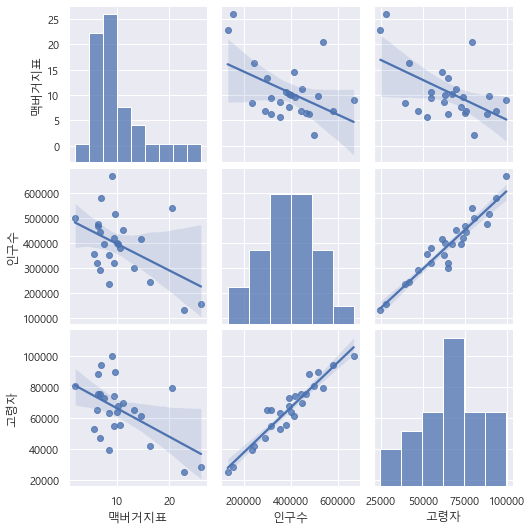

In [44]:
sns.pairplot(population_mc, vars=["맥버거지표", "인구수", "고령자"], kind="reg");

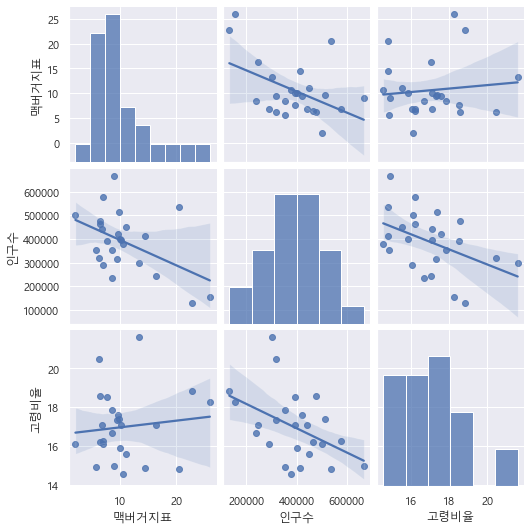

In [45]:
sns.pairplot(population_mc, vars=["맥버거지표", "인구수", "고령비율"], kind="reg");

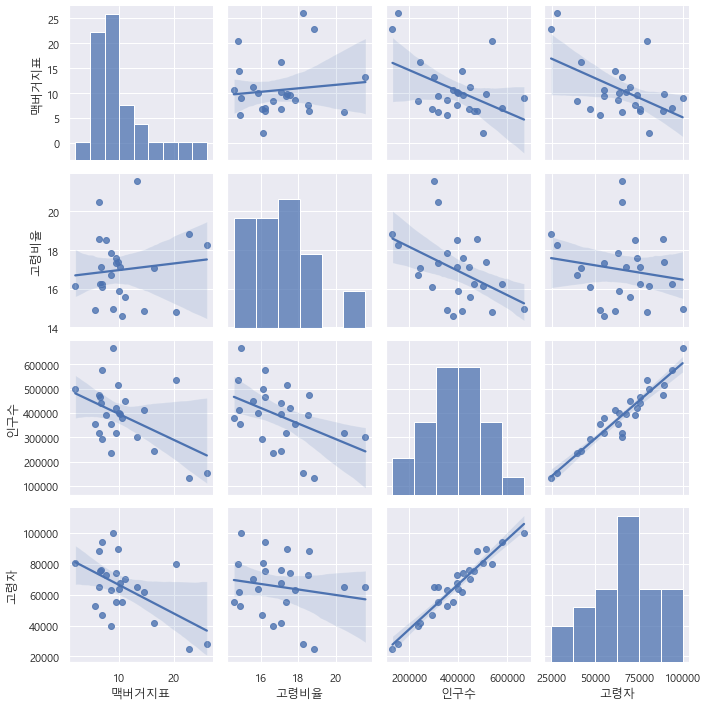

In [46]:
sns.pairplot(population_mc, vars=["맥버거지표", "고령비율", "인구수", "고령자"], kind="reg");